## LAB4. Pandas Grouping and Aggregation

Name:K.Nivetha
Roll No:235229120

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("thanksgiving.csv",encoding="latin-1")

FileNotFoundError: [Errno 2] No such file or directory: 'thanksgiving.csv'

In [4]:
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [5]:
data.shape

(1058, 65)

In [6]:
data["Do you celebrate Thanksgiving?"].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
data.columns[:5]

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?'],
      dtype='object')

### Apply function to Series

In [8]:
data["What is your gender?"].value_counts(dropna=False)


Female    544
Male      481
NaN        33
Name: What is your gender?, dtype: int64

In [9]:
import math
def gender_code(gender_string):
    if isinstance(gender_string, float) and math.isnan(gender_string):
        return gender_string
    return int(gender_string == "Female")

#### Apply gender_code() to What is your gender? column

In [10]:
data["gender"]=data["What is your gender?"].apply(gender_code)

In [11]:
data["gender"].value_counts(dropna=False)

1.0    544
0.0    481
NaN     33
Name: gender, dtype: int64

### Applying functions to DataFrames

In [12]:
data.apply(lambda x:x.dtype).head(5)

RespondentID                                                                              int64
Do you celebrate Thanksgiving?                                                           object
What is typically the main dish at your Thanksgiving dinner?                             object
What is typically the main dish at your Thanksgiving dinner? - Other (please specify)    object
How is the main dish typically cooked?                                                   object
dtype: object

#### Data Cleaning

In [13]:
data["How much total combined money did all members of your HOUSEHOLD earn last year?"]

0         $75,000 to $99,999
1         $50,000 to $74,999
2               $0 to $9,999
3            $200,000 and up
4       $100,000 to $124,999
                ...         
1053    $100,000 to $124,999
1054      $50,000 to $74,999
1055    $100,000 to $124,999
1056                     NaN
1057                     NaN
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, Length: 1058, dtype: object

In [14]:
import numpy as np
def clean_income(value):
    if value == "$200,000 and up":
        return 200000
    elif value == "Prefer not to answer":
        return np.nan
    elif isinstance(value, float) and math.isnan(value):
        return np.nan
    value = value.replace("$", "").replace(",","")
    income_high, income_low = value.split(" to ")
    return(int(income_high) + int(income_low)) / 2


In [15]:
data["income"]=data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(clean_income)
data["income"].head()

0     87499.5
1     62499.5
2      4999.5
3    200000.0
4    112499.5
Name: income, dtype: float64

#### Grouping Data with pandas

In [16]:
data["What type of cranberry saucedo you typically have?"].value_counts()

Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: What type of cranberry saucedo you typically have?, dtype: int64

##### Create a dataframe by filtering values"Housemade"

In [17]:
homemade_df=data[data["What type of cranberry saucedo you typically have?"]=="Homemade"]

In [18]:
canned_df=data[data["What type of cranberry saucedo you typically have?"]=="Canned_df"]

In [19]:
homemade_df.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,gender,income
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain,0.0,4999.5
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific,0.0,200000.0
5,4337929779,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Urban,18 - 29,Male,"$0 to $9,999",Pacific,0.0,4999.5
7,4337916002,Yes,Turkey,NaN,Baked,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,Rural,18 - 29,Male,Prefer not to answer,Mountain,0.0,NaN
13,4337878450,Yes,Turkey,NaN,Baked,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,No,NaN,Urban,18 - 29,Male,"$0 to $9,999",Middle Atlantic,0.0,4999.5


In [20]:
canned_df

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region,gender,income


In [21]:
homemade_df["income"].mean


<bound method NDFrame._add_numeric_operations.<locals>.mean of 2         4999.5
3       200000.0
5         4999.5
7            NaN
13        4999.5
          ...   
1034         NaN
1048     87499.5
1049         NaN
1053    112499.5
1056         NaN
Name: income, Length: 301, dtype: float64>

In [22]:
canned_df["income"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of Series([], Name: income, dtype: float64)>

##### Use groupby() and aggregate() to find out "Who earn more income?"

In [23]:
grouped = data.groupby("What type of cranberry saucedo you typically have?")
grouped

##### List out all groups that are created bygroupby()

In [24]:
grouped.groups

{'Canned': [4, 6, 8, 11, 12, 15, 18, 19, 26, 27, 38, 43, 48, 53, 58, 59, 60, 68, 69, 71, 74, 76, 79, 80, 86, 87, 89, 90, 91, 97, 103, 106, 107, 109, 115, 116, 118, 119, 123, 127, 129, 130, 132, 135, 136, 137, 140, 141, 143, 144, 145, 150, 153, 155, 156, 157, 158, 159, 161, 162, 163, 166, 167, 168, 169, 173, 179, 180, 181, 182, 184, 186, 190, 192, 193, 195, 198, 199, 200, 204, 205, 207, 209, 210, 211, 212, 213, 215, 217, 218, 220, 222, 224, 226, 229, 230, 231, 239, 243, 245, ...], 'Homemade': [2, 3, 5, 7, 13, 14, 16, 20, 21, 23, 25, 28, 30, 32, 33, 37, 39, 42, 44, 46, 52, 54, 56, 57, 62, 64, 66, 70, 82, 83, 85, 88, 93, 94, 96, 98, 101, 102, 108, 110, 111, 112, 114, 120, 122, 128, 134, 138, 139, 152, 165, 171, 172, 174, 175, 176, 177, 178, 183, 188, 189, 194, 201, 202, 203, 208, 219, 223, 225, 232, 234, 235, 236, 238, 241, 242, 244, 246, 248, 254, 255, 256, 259, 261, 262, 263, 264, 268, 281, 285, 286, 287, 290, 291, 292, 295, 298, 300, 302, 303, ...], 'None': [0, 17, 24, 29, 34, 36, 40, 

In [25]:
grouped.size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
dtype: int64

In [26]:
for name, group in grouped:
    print(name)
    print(group.shape)
    print(type(group))

Canned
(502, 67)
<class 'pandas.core.frame.DataFrame'>
Homemade
(301, 67)
<class 'pandas.core.frame.DataFrame'>
None
(146, 67)
<class 'pandas.core.frame.DataFrame'>
Other (please specify)
(25, 67)
<class 'pandas.core.frame.DataFrame'>


In [27]:
grouped["income"]

In [28]:
grouped["income"].size()

What type of cranberry saucedo you typically have?
Canned                    502
Homemade                  301
None                      146
Other (please specify)     25
Name: income, dtype: int64

#### Aggregating values in groups

##### Find out Avg Income

In [29]:
import numpy as num

In [30]:
grouped['income'].agg(num.mean)

What type of cranberry saucedo you typically have?
Canned                    83823.403409
Homemade                  94878.107287
None                      78886.084034
Other (please specify)    86629.978261
Name: income, dtype: float64

In [31]:
grouped.agg(num.mean)

C:\Users\nivet\AppData\Local\Temp\ipykernel_2996\1220755280.py:1: FutureWarning: The operation <function mean at 0x0000017A040E7A30> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  grouped.agg(num.mean)


,RespondentID,gender,income
What type of cranberry saucedo you typically have?,,,
Canned,4.336699e+09,0.552846,83823.403409
Homemade,4.336792e+09,0.533101,94878.107287
None,4.336765e+09,0.517483,78886.084034
Other (please specify),4.336763e+09,0.640000,86629.978261


#### Plotting the results of aggregation

##### What is the average income of each category?

C:\Users\nivet\AppData\Local\Temp\ipykernel_2996\1672384121.py:1: FutureWarning: The operation <function mean at 0x0000017A040E7A30> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  sauce = grouped.agg(num.mean)


<Axes: xlabel='What type of cranberry saucedo you typically have?'>

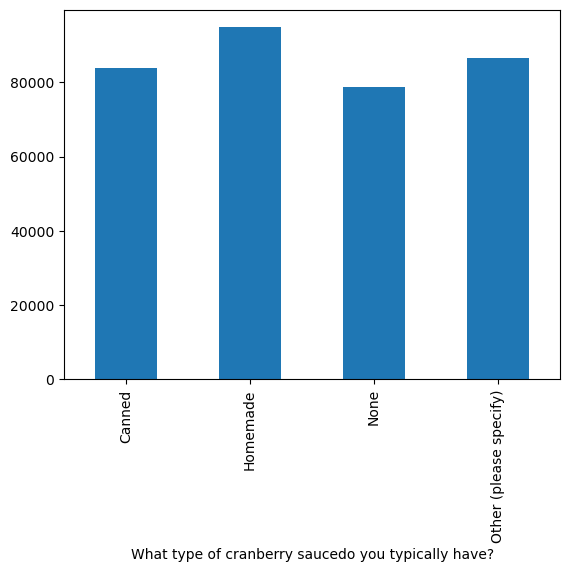

In [32]:
sauce = grouped.agg(num.mean)
sauce['income'].plot(kind='bar')

In [33]:
grouped = data.groupby(['What type of cranberry saucedo you typically have?','What type of cranberry saucedo you typically have?'])
grouped.agg(num.mean)

C:\Users\nivet\AppData\Local\Temp\ipykernel_2996\2173557155.py:2: FutureWarning: The operation <function mean at 0x0000017A040E7A30> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  grouped.agg(num.mean)


,,RespondentID,gender,income
What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have?,,,
Canned,Canned,4.336699e+09,0.552846,83823.403409
Homemade,Homemade,4.336792e+09,0.533101,94878.107287
None,None,4.336765e+09,0.517483,78886.084034
Other (please specify),Other (please specify),4.336763e+09,0.640000,86629.978261


In [34]:
grouped = data.groupby('How would you describe where you live?')['What is typically the main dish at your Thanksgiving dinner?']
grouped.apply(lambda x:x.value_counts())

How would you describe where you live?                        
Rural                                   Turkey                    189
                                        Other (please specify)      9
                                        Ham/Pork                    7
                                        Tofurkey                    3
                                        I don't know                3
                                        Turducken                   2
                                        Chicken                     2
                                        Roast beef                  1
Suburban                                Turkey                    449
                                        Ham/Pork                   17
                                        Other (please specify)     13
                                        Tofurkey                    9
                                        Chicken                     3
                           